In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Resources/Data/combined_data.csv')
data.head()

,Unnamed: 0,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,0.0,97.0,97.0,0.1,4245.39744,5479531.0,0.9,0.8,0.893,17.0
1,1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,0.0,93.0,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
2,2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,0.0,97.0,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
3,3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,0.0,92.0,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
4,4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,0.0,95.0,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7


In [4]:
data.rename(columns = {'Unnamed: 0':'country_id'}, inplace = True)
data.head()


,country_id,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,...,0.0,97.0,97.0,0.1,4245.39744,5479531.0,0.9,0.8,0.893,17.0
1,1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,...,0.0,93.0,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
2,2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,...,0.0,97.0,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
3,3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,...,0.0,92.0,92.0,0.1,5734.44360,33815.0,1.0,0.9,0.919,19.0
4,4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,...,0.0,95.0,95.0,0.1,7455.24654,518867.0,0.8,0.7,0.948,17.7


In [5]:
data.columns

Index(['country_id', 'Country', 'Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Happiness (Dystopia)', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling'],
      dtype='object')

In [6]:
data = data[['country_id','Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Happiness (Dystopia)', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling']]
data

,country_id,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,263.000000,...,0.0,97.0,97.0,0.1,4245.397440,5479531.0,0.900000,0.800000,0.893,17.0
1,1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,224.000000,...,0.0,93.0,93.0,0.1,5314.644160,5683483.0,1.100000,0.900000,0.923,19.2
2,2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,185.000000,...,0.0,97.0,97.0,0.1,8989.842400,8282396.0,0.400000,0.300000,0.938,16.0
3,3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,233.000000,...,0.0,92.0,92.0,0.1,5734.443600,33815.0,1.000000,0.900000,0.919,19.0
4,4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,169.000000,...,0.0,95.0,95.0,0.1,7455.246540,518867.0,0.800000,0.700000,0.948,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,17.000000,...,21.0,47.0,47.0,4.4,348.381417,45461.0,8.200000,8.200000,0.347,7.1
151,151,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,43.000000,...,15.0,99.0,98.0,0.4,71.348397,11629553.0,5.700000,5.700000,0.493,10.8
152,152,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,64.000000,...,32.0,88.0,87.0,6.2,118.693830,15777451.0,5.600000,5.500000,0.507,10.3
153,153,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,112.986486,...,39.0,41.0,31.0,3.4,758.725782,11882136.0,4.493103,4.494483,0.421,4.9


In [7]:
# sklearn.preprocessing.normalize(X, norm='l2', *, axis=1, copy=True, return_norm=False)[source]

In [8]:
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(data)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(data)

# store the results in a data frame
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

#country_id should not be scaled?

# visualize the data frame
data_scaled

,country_id,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0.000000,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,1.0,0.699468,...,0.000000,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333
1,0.006494,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,1.0,0.595745,...,0.000000,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176
2,0.012987,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,1.0,0.492021,...,0.000000,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314
3,0.019481,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,1.0,0.619681,...,0.000000,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373
4,0.025974,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,1.0,0.449468,...,0.000000,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.974026,0.445132,0.578582,0.327762,0.588507,0.657315,0.146987,0.953207,1.0,0.045213,...,0.019091,0.474747,0.474747,0.473118,0.006160,0.000176,0.307116,0.300366,0.366034,0.348039
151,0.980519,0.424181,0.663725,0.554891,0.795510,0.923683,0.098961,0.196178,1.0,0.114362,...,0.013636,1.000000,0.989899,0.043011,0.001262,0.045047,0.213483,0.208791,0.520042,0.529412
152,0.987013,0.422503,0.686921,0.782925,0.724140,0.729702,-0.128533,0.866022,1.0,0.170213,...,0.029091,0.888889,0.878788,0.666667,0.002099,0.061115,0.209738,0.201465,0.534810,0.504902
153,0.993506,0.360700,0.648464,0.568097,0.664023,0.462887,0.029462,0.815978,1.0,0.300496,...,0.035455,0.414141,0.313131,0.365591,0.013416,0.046026,0.168281,0.164633,0.444093,0.240196


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets.samples_generator import make_blobs 

C:\Users\Wayne Gardner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)

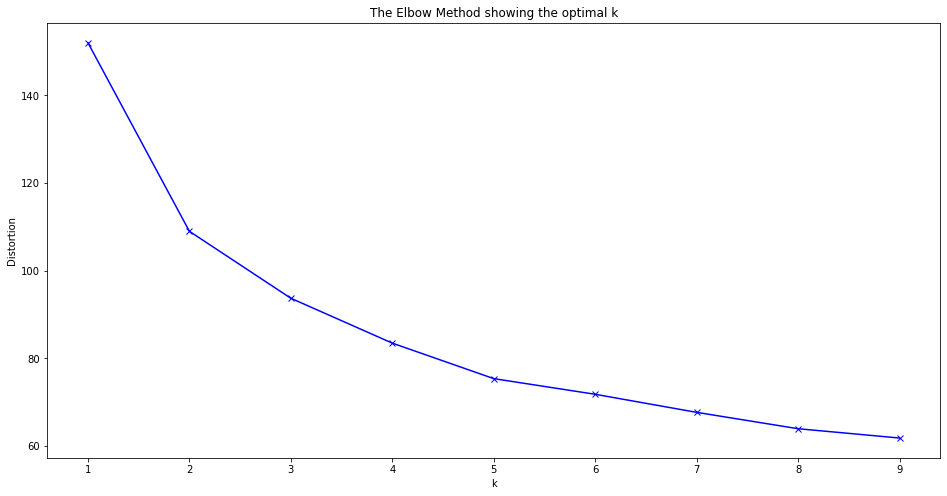

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
Working through this example
https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [12]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(data_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(data_scaled)

In [14]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=data_scaled.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

NameError: name 'clusters' is not defined